## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [1]:
# Import pandas
# ... YOUR CODE FOR TASK 1 ...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset
cc_apps = pd.read_csv("datasets/cc_approvals.data",header=None)

# Inspect data
# ... YOUR CODE FOR TASK 1 ...
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [2]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
# ... YOUR CODE FOR TASK 2 ...

print(cc_apps.tail(17))

print(cc_apps)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64

In [3]:
cc_apps.shape

(690, 16)

In [4]:
cc_apps[0].unique()

array(['b', 'a', '?'], dtype=object)

In [5]:
cc_apps[0].value_counts()

b    468
a    210
?     12
Name: 0, dtype: int64

In [6]:
cc_apps.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
# coulmn names
cc_apps.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [8]:
#mapping column names to exact name as per data dictionary
cc_apps = cc_apps.rename(columns={0: 'Gender', 1: 'Age', 2:'Debt', 3:'Married', 4:'BankCustomer', 5:'EducationLevel', 6:'Ethnicity', 7:'YearsEmployed', 8:'PriorDefault', 9:'Employed', 10:'CreditScore', 11:'DriversLicense', 12:'Citizen', 13:'ZipCode', 14:'Income', 15: 'ApprovalStatus'})

Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [9]:
# Import numpy
# ... YOUR CODE FOR TASK 3 ...

# Inspect missing values in the dataset

print(cc_apps.isnull().sum())

# Replace the '?'s with NaN
cc_apps = cc_apps.replace(to_replace ="?",value ="NaN") 

# Inspect the missing values again
# ... YOUR CODE FOR TASK 3 ...

column_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

for columns in column_names:
    print('\n')
    print("**********************************************")
    print("Column_name:", columns)
    print(cc_apps[str(columns)].unique())
    print(cc_apps[str(columns)].value_counts())
    print("**********************************************")
    print('\n')

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


**********************************************
Column_name: Gender
['b' 'a' 'NaN']
b      468
a      210
NaN     12
Name: Gender, dtype: int64
**********************************************




**********************************************
Column_name: Age
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '

## 4. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [10]:
# Impute the missing values with mean imputation
# eg. cc_apps.fillna(..., inplace=True)

# Count the number of NaNs in the dataset to verify
# ... YOUR CODE FOR TASK 4 ...


cc_apps['Age'] = pd.to_numeric(cc_apps['Age'],errors='coerce')
cc_apps['Age'] = cc_apps['Age'].fillna((cc_apps['Age'].mean()))
cc_apps['Age'].value_counts()
cc_apps['Age'].unique()

array([30.83      , 58.67      , 24.5       , 27.83      , 20.17      ,
       32.08      , 33.17      , 22.92      , 54.42      , 42.5       ,
       22.08      , 29.92      , 38.25      , 48.08      , 45.83      ,
       36.67      , 28.25      , 23.25      , 21.83      , 19.17      ,
       25.        , 47.75      , 27.42      , 41.17      , 15.83      ,
       47.        , 56.58      , 57.42      , 42.08      , 29.25      ,
       42.        , 49.5       , 36.75      , 22.58      , 27.25      ,
       23.        , 27.75      , 54.58      , 34.17      , 28.92      ,
       29.67      , 39.58      , 56.42      , 54.33      , 41.        ,
       31.92      , 41.5       , 23.92      , 25.75      , 26.        ,
       37.42      , 34.92      , 34.25      , 23.33      , 23.17      ,
       44.33      , 35.17      , 43.25      , 56.75      , 31.67      ,
       23.42      , 20.42      , 26.67      , 36.        , 25.5       ,
       19.42      , 32.33      , 34.83      , 38.58      , 44.25

## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>

In [11]:
# Iterate over each column of cc_apps
#for col in ...:
#   Check if the column is of object type
#    if cc_apps[col].... == 'object':
#        # Impute with the most frequent value
#        cc_apps = cc_apps....(...[col]....)

# Count the number of NaNs in the dataset and print the counts to verify
# ... YOUR CODE FOR TASK 5 ...



print(cc_apps["Gender"].unique())
cc_apps["Gender"] = cc_apps["Gender"].replace(to_replace =["NaN"],value ="b") 
print(cc_apps["Gender"].unique())
print(cc_apps["Gender"].value_counts())


print(cc_apps["Married"].unique())
print(cc_apps["Married"].value_counts())
cc_apps["Married"] = cc_apps["Married"].replace(to_replace =["NaN","l"],value ="u") 
print(cc_apps["Married"].unique())
print(cc_apps["Married"].value_counts())


print(cc_apps["BankCustomer"].unique())
print(cc_apps["BankCustomer"].value_counts())
cc_apps["BankCustomer"] = cc_apps["BankCustomer"].replace(to_replace =["NaN","gg"],value ="g") 
print(cc_apps["BankCustomer"].unique())
print(cc_apps["BankCustomer"].value_counts())


print(cc_apps["EducationLevel"].unique())
print(cc_apps["EducationLevel"].value_counts())
cc_apps["EducationLevel"] = cc_apps["EducationLevel"].replace(to_replace =["NaN"],value ="c") 
print(cc_apps["EducationLevel"].unique())
print(cc_apps["EducationLevel"].value_counts())


print(cc_apps["Ethnicity"].unique())
print(cc_apps["Ethnicity"].value_counts())
cc_apps["Ethnicity"] = cc_apps["Ethnicity"].replace(to_replace =["NaN"],value ="v") 
print(cc_apps["Ethnicity"].unique())
print(cc_apps["Ethnicity"].value_counts())


print(cc_apps["ZipCode"].unique())
print(cc_apps["ZipCode"].value_counts())
cc_apps["ZipCode"] = cc_apps["ZipCode"].replace(to_replace =["NaN"],value ="00000") 
print(cc_apps["ZipCode"].unique())
print(cc_apps["ZipCode"].value_counts())


['b' 'a' 'NaN']
['b' 'a']
b    480
a    210
Name: Gender, dtype: int64
['u' 'y' 'NaN' 'l']
u      519
y      163
NaN      6
l        2
Name: Married, dtype: int64
['u' 'y']
u    527
y    163
Name: Married, dtype: int64
['g' 'p' 'NaN' 'gg']
g      519
p      163
NaN      6
gg       2
Name: BankCustomer, dtype: int64
['g' 'p']
g    527
p    163
Name: BankCustomer, dtype: int64
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' 'NaN']
c      137
q       78
w       64
i       59
aa      54
ff      53
k       51
cc      41
m       38
x       38
d       30
e       25
j       10
NaN      9
r        3
Name: EducationLevel, dtype: int64
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64
['v' 'h' 'bb' 'ff' 'j' 'z' 'NaN' 'o' 'dd' 'n']
v      399
h      138
bb      59
ff      57
NaN      9
j        8
z     

## Visualizing the data

In [12]:
cc_apps["ApprovalStatus"]

cc_apps["ApprovalStatus"] = cc_apps["ApprovalStatus"].replace(to_replace =["+"],value =1) 
cc_apps["ApprovalStatus"] = cc_apps["ApprovalStatus"].replace(to_replace =["-"],value =0) 

cc_apps["ApprovalStatus"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    0
668    0
669    0
670    0
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    0
681    0
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
Name: ApprovalStatus, Length: 690, dtype: int64

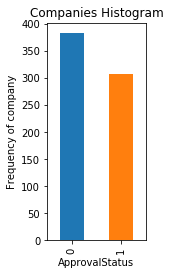

In [13]:

plt.subplot(1,3,3)
plt1 = cc_apps.ApprovalStatus.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'ApprovalStatus', ylabel='Frequency of company')

plt.show()

Inferences:

1) 55 % of holders are wrongly approved and rest are correctly approved, it indicates prior probability is mostly pointing towards default

## Visualising Categorical Data

Categorical values are

1) Gender  
2) Married
3) BankCustomer
4) EducationLevel
5) Ethnicity
6) PriorDefault
7) Employed
8) DriversLicense
9) Citizen
10) ApprovalStatus

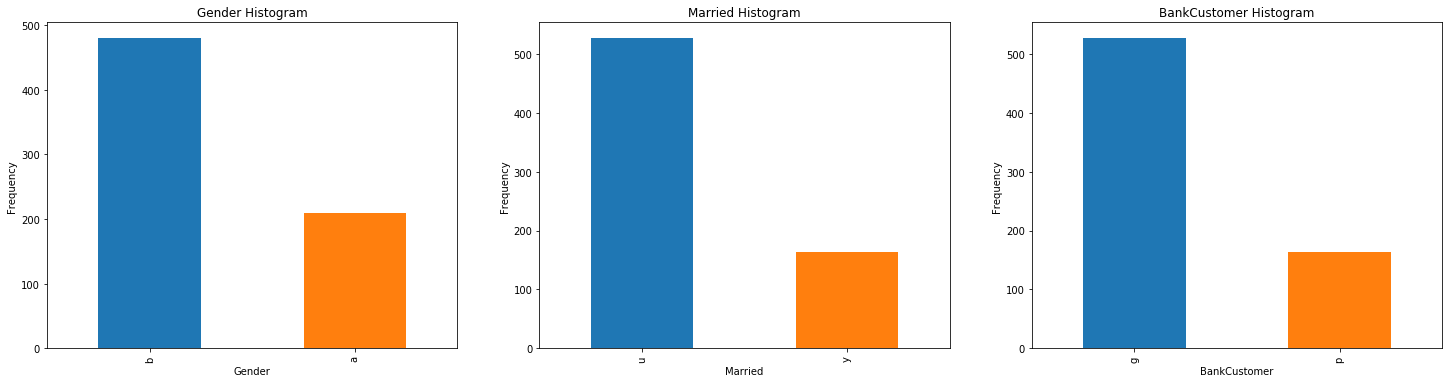

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cc_apps.Gender.value_counts().plot('bar')
plt.title('Gender Histogram')
plt1.set(xlabel = 'Gender', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = cc_apps.Married.value_counts().plot('bar')
plt.title('Married Histogram')
plt1.set(xlabel = 'Married', ylabel='Frequency')

plt.subplot(1,3,3)
plt1 = cc_apps.BankCustomer.value_counts().plot('bar')
plt.title('BankCustomer Histogram')
plt1.set(xlabel = 'BankCustomer', ylabel='Frequency')

plt.show()

Inferences:



1) Gender 'b' is having more count compared to 'a'


2) Marriage status and Bank customer categories are having high frequency compared to rest value

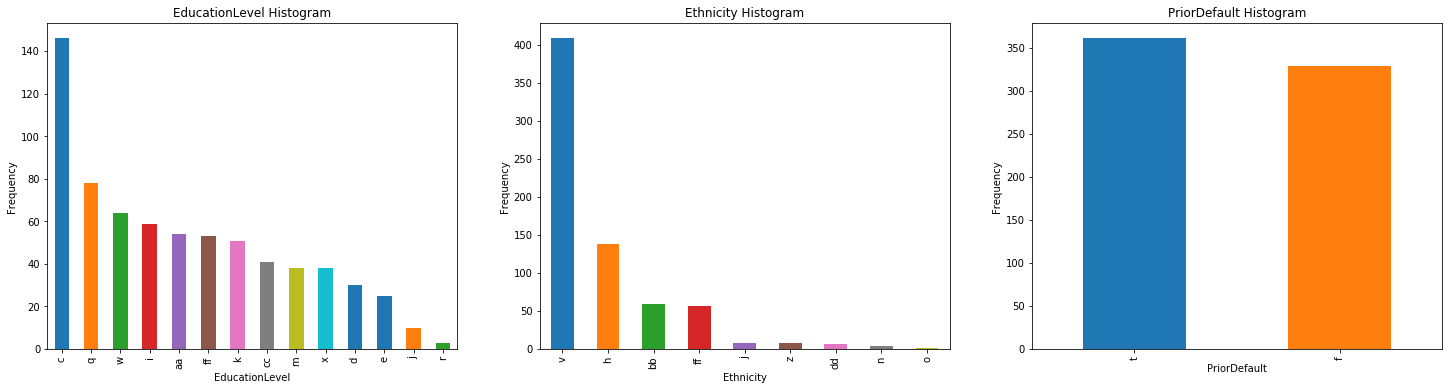

In [15]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cc_apps.EducationLevel.value_counts().plot('bar')
plt.title('EducationLevel Histogram')
plt1.set(xlabel = 'EducationLevel', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = cc_apps.Ethnicity.value_counts().plot('bar')
plt.title('Ethnicity Histogram')
plt1.set(xlabel = 'Ethnicity', ylabel='Frequency')

plt.subplot(1,3,3)
plt1 = cc_apps.PriorDefault.value_counts().plot('bar')
plt.title('PriorDefault Histogram')
plt1.set(xlabel = 'PriorDefault', ylabel='Frequency')

plt.show()

Inferences:


1)Education level 'c' and Ethnicity 'v' are having more frequency as per data

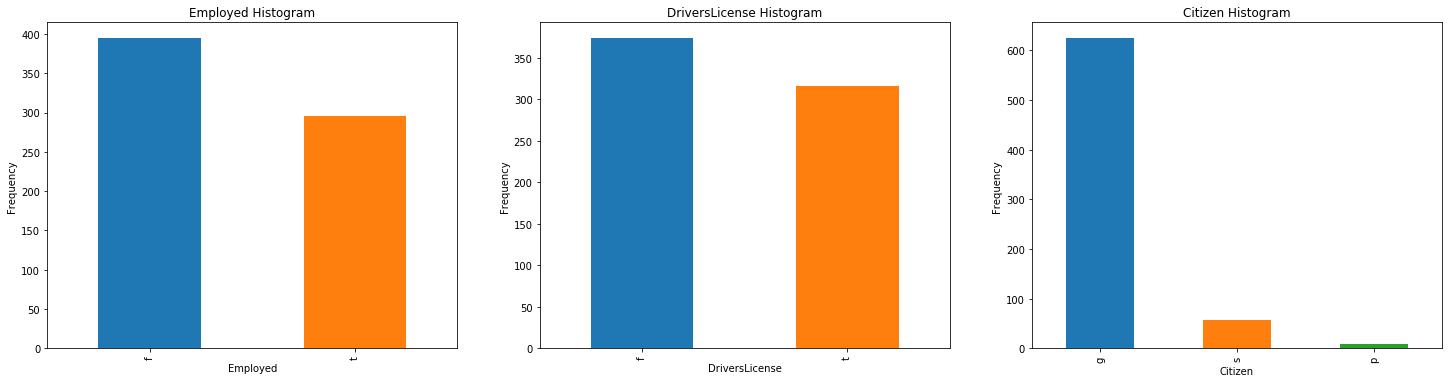

In [16]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cc_apps.Employed.value_counts().plot('bar')
plt.title('Employed Histogram')
plt1.set(xlabel = 'Employed', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = cc_apps.DriversLicense.value_counts().plot('bar')
plt.title('DriversLicense Histogram')
plt1.set(xlabel = 'DriversLicense', ylabel='Frequency')

plt.subplot(1,3,3)
plt1 = cc_apps.Citizen.value_counts().plot('bar')
plt.title('Citizen Histogram')
plt1.set(xlabel = 'Citizen', ylabel='Frequency')

plt.show()

Inferences:

1) Driver's license is not haing imoact on this, because values are shared equally


2) Citizen value 'g' is covering almost 90% of the data

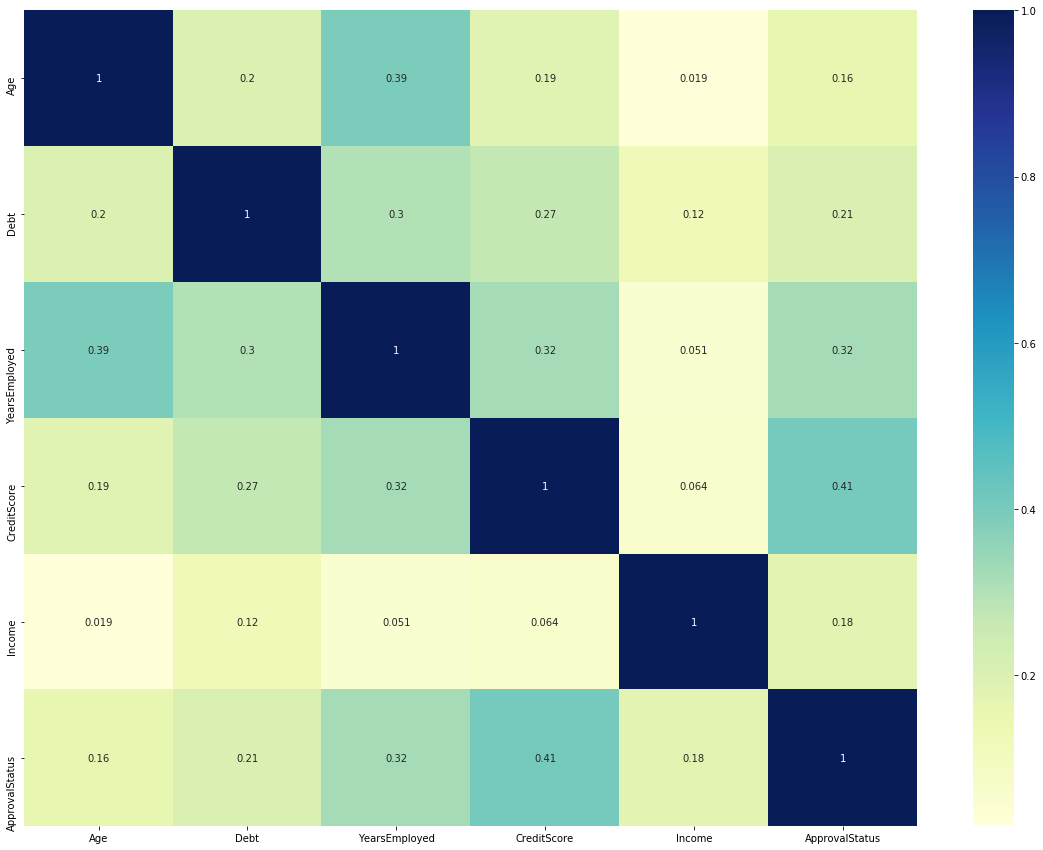

In [17]:
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(cc_apps.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inferences

Important variables after Univariate analysis, bivariate analysis and correlations factors are

1) Credit score is important factor for deciding Approval status and it's highly correlated.

2) Years Employed field is highly correlated

2) Age Debt and Income are partially corelated field, having equal effect.

## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [18]:
#Mapping binary values to 1's and 0's

# replacing Gender column values from string to integer, 'b' with 1 and 'a' with 0
cc_apps["Gender"] = cc_apps["Gender"].replace(to_replace =["b"],value =1) 
cc_apps["Gender"] = cc_apps["Gender"].replace(to_replace =["a"],value =0) 

# replacing Married column values from string to integer, 'u' with 1 and 'y' with 0
cc_apps["Married"] = cc_apps["Married"].replace(to_replace =["u"],value =1) 
cc_apps["Married"] = cc_apps["Married"].replace(to_replace =["y"],value =0) 

# replacing BankCustomer column values from string to integer, 'g' with 1 and 'p' with 0
cc_apps["BankCustomer"] = cc_apps["BankCustomer"].replace(to_replace =["g"],value =1) 
cc_apps["BankCustomer"] = cc_apps["BankCustomer"].replace(to_replace =["p"],value =0) 

# replacing PriorDefault column values from string to integer, 't' with 1 and 'f' with 0
cc_apps["PriorDefault"] = cc_apps["PriorDefault"].replace(to_replace =["t"],value =1) 
cc_apps["PriorDefault"] = cc_apps["PriorDefault"].replace(to_replace =["f"],value =0) 

# replacing Employed column values from string to integer, 't' with 1 and 'f' with 0
cc_apps["Employed"] = cc_apps["Employed"].replace(to_replace =["t"],value =1) 
cc_apps["Employed"] = cc_apps["Employed"].replace(to_replace =["f"],value =0) 

# replacing DriversLicense column values from string to integer, 't' with 1 and 'f' with 0
cc_apps["DriversLicense"] = cc_apps["DriversLicense"].replace(to_replace =["t"],value =1) 
cc_apps["DriversLicense"] = cc_apps["DriversLicense"].replace(to_replace =["f"],value =0) 

In [19]:
cc_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,1,w,v,1.250,1,1,1,0,g,00202,0,1
1,0,58.67,4.460,1,1,q,h,3.040,1,1,6,0,g,00043,560,1
2,0,24.50,0.500,1,1,q,h,1.500,1,0,0,0,g,00280,824,1
3,1,27.83,1.540,1,1,w,v,3.750,1,1,5,1,g,00100,3,1
4,1,20.17,5.625,1,1,w,v,1.710,1,0,0,0,s,00120,0,1
5,1,32.08,4.000,1,1,m,v,2.500,1,0,0,1,g,00360,0,1
6,1,33.17,1.040,1,1,r,h,6.500,1,0,0,1,g,00164,31285,1
7,0,22.92,11.585,1,1,cc,v,0.040,1,0,0,0,g,00080,1349,1
8,1,54.42,0.500,0,0,k,h,3.960,1,0,0,0,g,00180,314,1
9,1,42.50,4.915,0,0,w,v,3.165,1,0,0,1,g,00052,1442,1


In [20]:
#Function to check unique values and their counts

def variable_counts():
    column_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']
    
    for columns in column_names:
        print('\n')
        print("**********************************************")
        print("Column_name:", columns)
        print(cc_apps[str(columns)].unique())
        print(cc_apps[str(columns)].value_counts())
        print("**********************************************")
        print('\n')

In [21]:
#Function to check unique values and their counts

variable_counts()



**********************************************
Column_name: Gender
[1 0]
1    480
0    210
Name: Gender, dtype: int64
**********************************************




**********************************************
Column_name: Age
[30.83       58.67       24.5        27.83       20.17       32.08
 33.17       22.92       54.42       42.5        22.08       29.92
 38.25       48.08       45.83       36.67       28.25       23.25
 21.83       19.17       25.         47.75       27.42       41.17
 15.83       47.         56.58       57.42       42.08       29.25
 42.         49.5        36.75       22.58       27.25       23.
 27.75       54.58       34.17       28.92       29.67       39.58
 56.42       54.33       41.         31.92       41.5        23.92
 25.75       26.         37.42       34.92       34.25       23.33
 23.17       44.33       35.17       43.25       56.75       31.67
 23.42       20.42       26.67       36.         25.5        19.42
 32.33       34.83       38.58

In [22]:
# Map ---> Dummy variable creator for categorical variables having more than 2 categories
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cc_apps

cc_apps = dummies('EducationLevel',cc_apps)
cc_apps = dummies('Ethnicity',cc_apps)
cc_apps = dummies('Citizen',cc_apps)


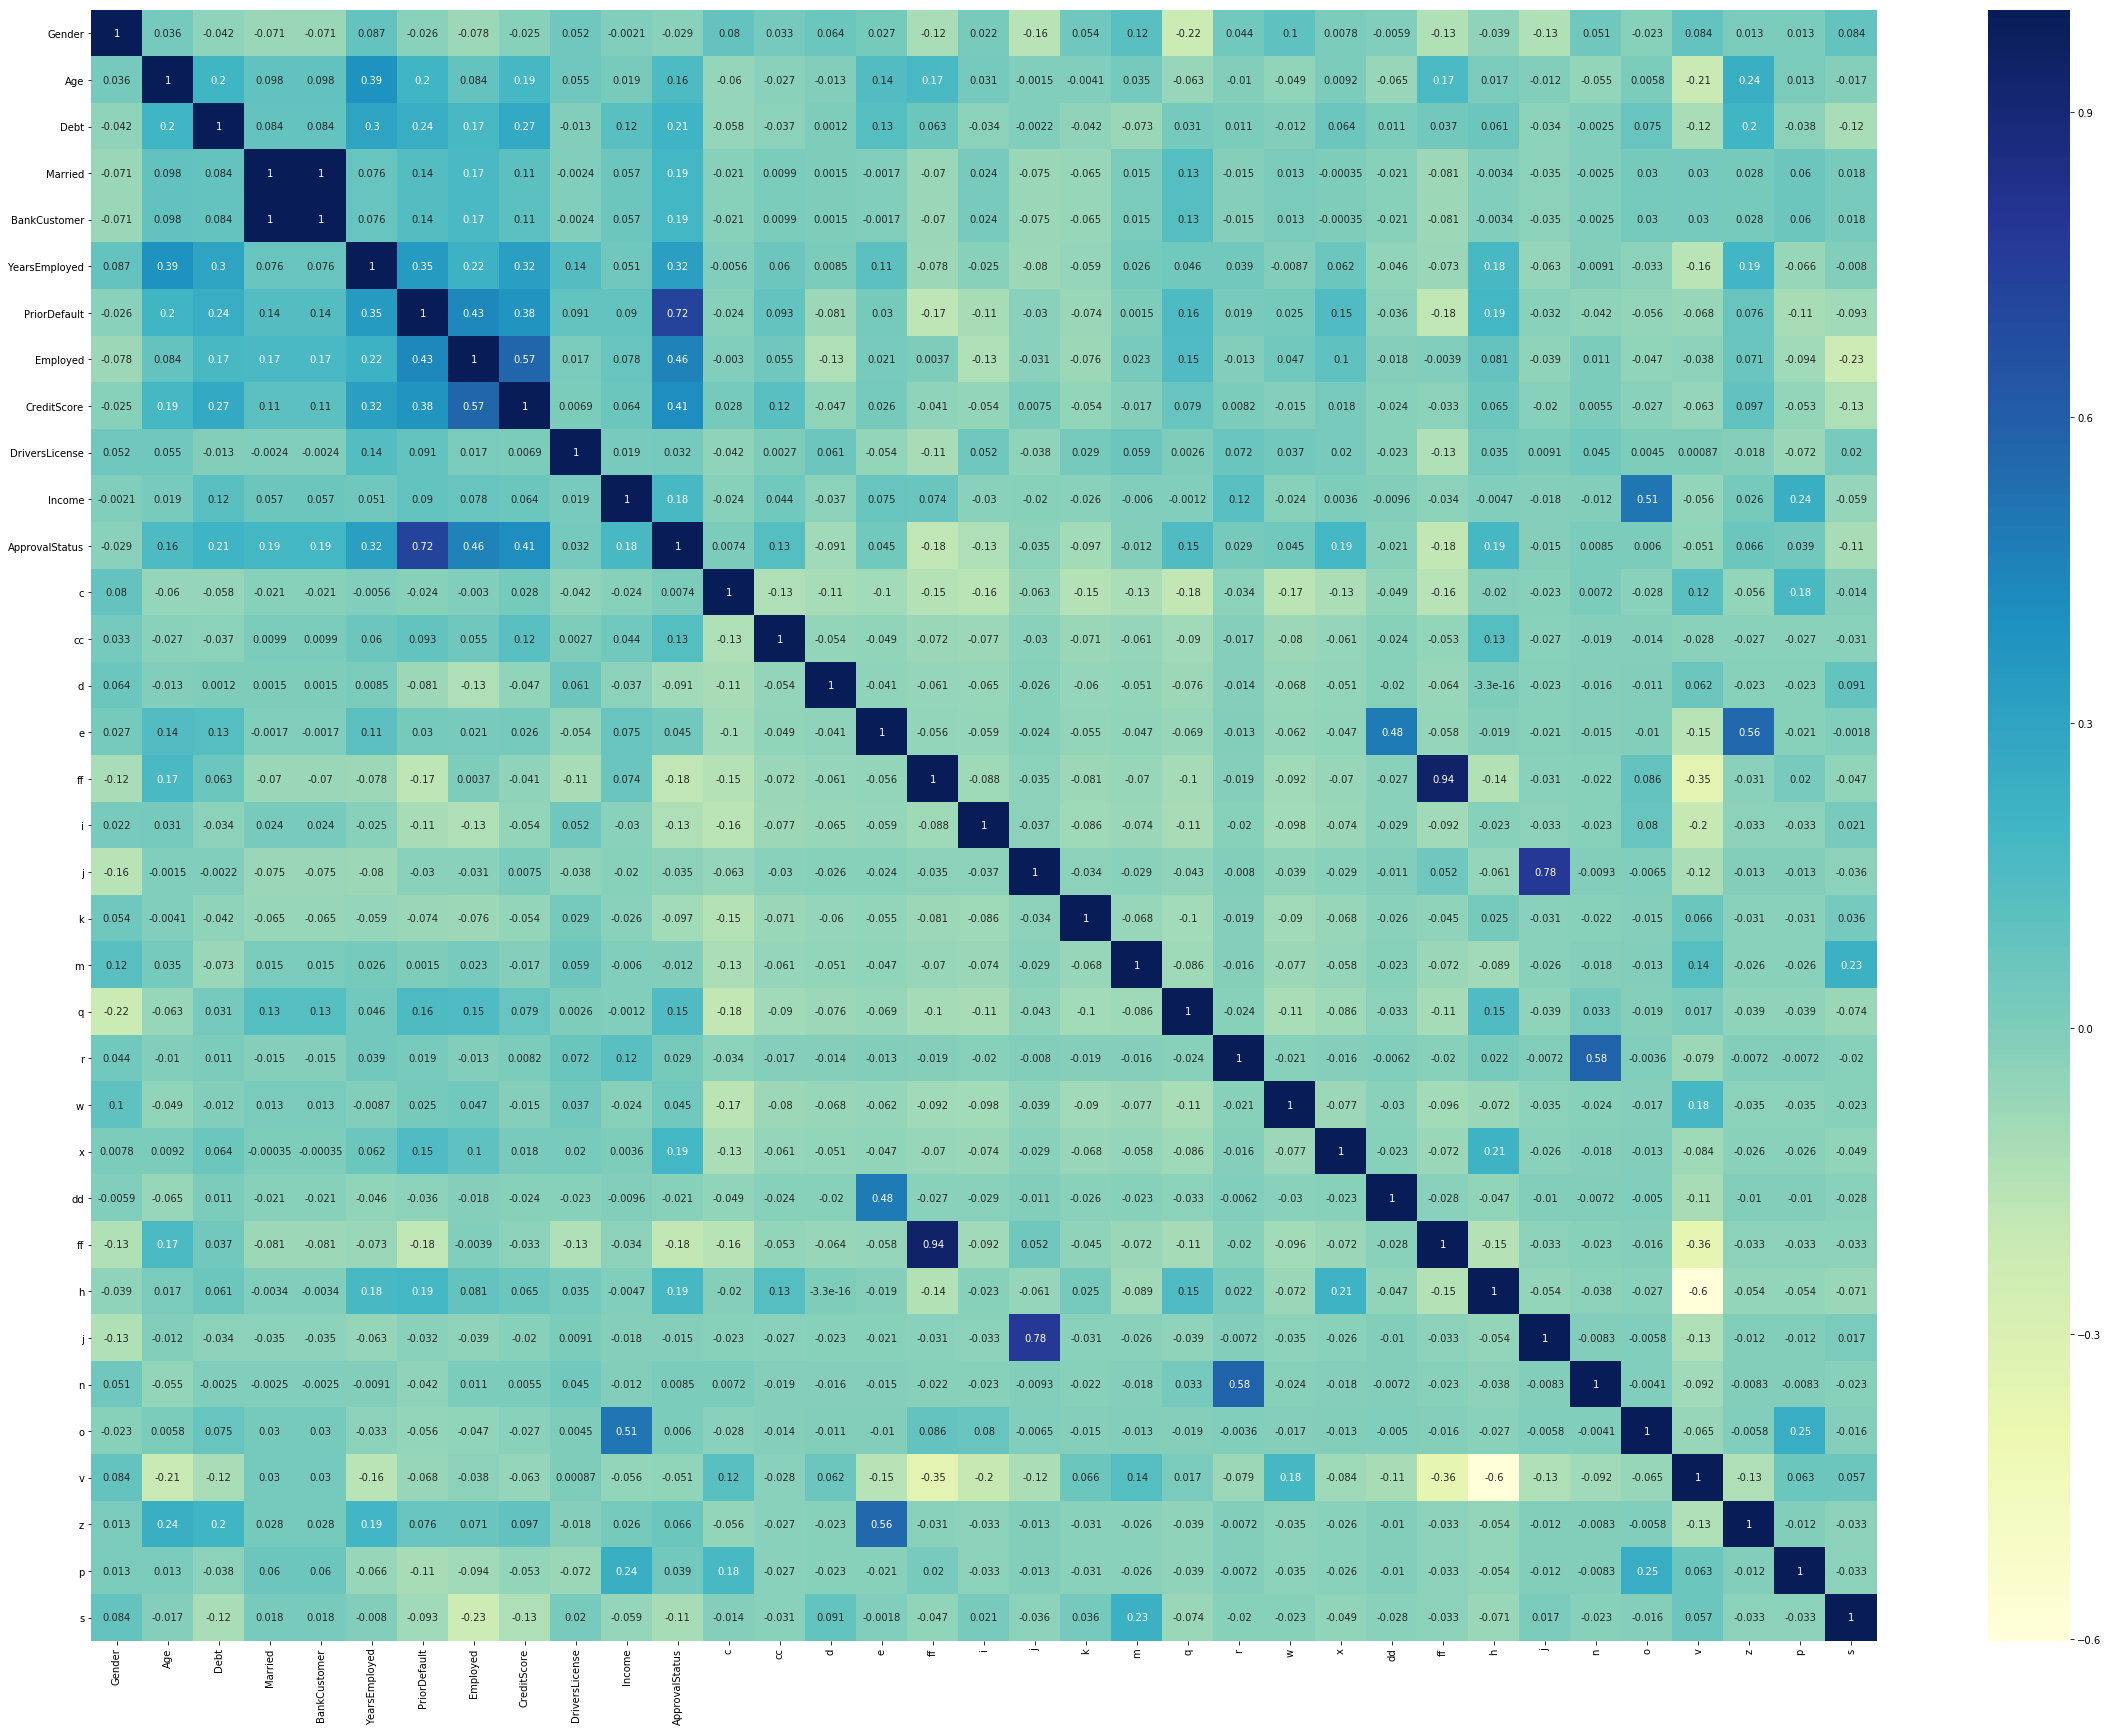

In [23]:
#correlation matrix for finding correlation between fields

plt.figure(figsize = (40, 30))
sns.heatmap(cc_apps.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
#datatype checking for further process 

cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 36 columns):
Gender            690 non-null int64
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null int64
BankCustomer      690 non-null int64
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int64
Employed          690 non-null int64
CreditScore       690 non-null int64
DriversLicense    690 non-null int64
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null int64
c                 690 non-null uint8
cc                690 non-null uint8
d                 690 non-null uint8
e                 690 non-null uint8
ff                690 non-null uint8
i                 690 non-null uint8
j                 690 non-null uint8
k                 690 non-null uint8
m                 690 non-null uint8
q                 690 non-null uint8
r                 690 non-null uint8


C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


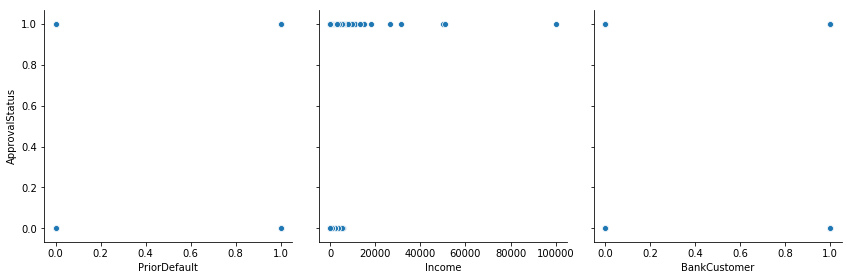

In [25]:
def pair_plot(x,y,z):
    sns.pairplot(cc_apps, x_vars=[x,y,z], y_vars='ApprovalStatus',size=4, aspect=1, kind='scatter')
    plt.show()

pair_plot('PriorDefault', 'Income', 'BankCustomer')
#pair_plot('compressionratio', 'horsepower', 'peakrpm')
#pair_plot('wheelbase', 'citympg', 'highwaympg')

## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X = cc_apps.drop(['ApprovalStatus'], axis=1)

X.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,dd,ff,h,j,n,o,v,z,p,s
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,1,0,0,0,0,0,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [28]:
# Putting response variable to y
y = cc_apps['ApprovalStatus']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: ApprovalStatus, dtype: int64

In [29]:
X = X.drop(['DriversLicense','ZipCode'], axis=1)

X.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,...,dd,ff,h,j,n,o,v,z,p,s
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,560,...,0,0,1,0,0,0,0,0,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,824,...,0,0,1,0,0,0,0,0,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,3,...,0,0,0,0,0,0,1,0,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Feature scaling

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

cc_apps[['Age','Debt','YearsEmployed','CreditScore','Income']] = scaler.fit_transform(cc_apps[['Age','Debt','YearsEmployed','CreditScore','Income']])

cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,dd,ff,h,j,n,o,v,z,p,s
0,1,-0.062321,-0.956613,1,1,-0.291083,1,1,-0.288101,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2.288101,-0.060051,1,1,0.244190,1,1,0.740830,0,...,0,0,1,0,0,0,0,0,0,0
2,0,-0.596738,-0.856102,1,1,-0.216324,1,0,-0.493887,0,...,0,0,1,0,0,0,0,0,0,0
3,1,-0.315599,-0.647038,1,1,0.456505,1,1,0.535044,1,...,0,0,0,0,0,0,1,0,0,0
4,1,-0.962303,0.174141,1,1,-0.153526,1,0,-0.493887,0,...,0,0,0,0,0,0,1,0,0,1


In [34]:
variable_counts()



**********************************************
Column_name: Gender
[1 0]
1    480
0    210
Name: Gender, dtype: int64
**********************************************




**********************************************
Column_name: Age
[-6.23208960e-02  2.28810134e+00 -5.96738020e-01 -3.15599154e-01
 -9.62302973e-01  4.32117114e-02  1.35236145e-01 -7.30131236e-01
  1.92929047e+00  9.22931528e-01 -8.01049149e-01 -1.39148634e-01
  5.64120662e-01  1.39402909e+00  1.20407039e+00  4.30727446e-01
 -2.80140198e-01 -7.02270628e-01 -8.22155670e-01 -1.04672906e+00
 -5.54524977e-01  1.36616848e+00 -3.50213849e-01  8.10644833e-01
 -1.32871219e+00  1.30284891e+00  2.11165082e+00  2.18256873e+00
  8.87472571e-01 -1.95714112e-01  8.80718485e-01  1.51391413e+00
  4.37481533e-01 -7.58836106e-01 -3.64566284e-01 -7.23377149e-01
 -3.22353241e-01  1.94279865e+00  2.19662231e-01 -2.23574720e-01
 -1.60255156e-01  6.76407356e-01  2.09814264e+00  1.92169212e+00
  7.96292399e-01  2.97035377e-02  8.38505442e-01 -

KeyError: 'EducationLevel'

In [ ]:
# Import train_test_split
# ... YOUR CODE FOR TASK 7 ...

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
#cc_apps = cc_apps.drop([..., ...], axis=1)
#cc_apps = cc_apps....





# Segregate features and labels into separate variables
#X,y = cc_apps[:,0:...] , cc_apps[:,...]

# Split into train and test sets
#..., X_test, y_train, ... = ...(...,
                              #  y,
                               # test_size=...,
                               # random_state=...)

In [35]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 8. Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

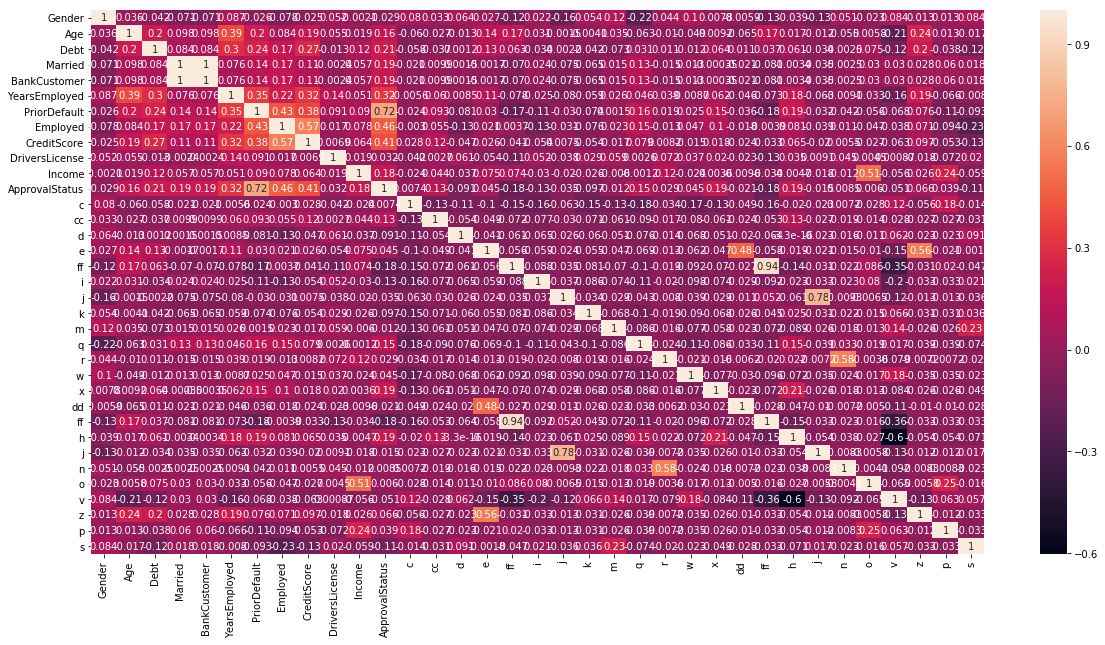

In [36]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(cc_apps.corr(),annot = True)
plt.show()

In [ ]:
# Import MinMaxScaler
# ... YOUR CODE FOR TASK 8 ...

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
#scaler = MinMaxScaler(feature_range=(..., ...))
#rescaledX_train = scaler.....(...)
#rescaledX_test = scaler.....(...)

In [37]:
X_test = X_test.drop(['s','n','j','dd','w','r','m','k','j','i','c','ff'], 1)
X_train = X_train.drop(['s','n','j','dd','w','r','m','k','j','i','c','ff'], 1)


## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [ ]:
# Import LogisticRegression
# ... YOUR CODE FOR TASK 9 ...

# Instantiate a LogisticRegression classifier with default parameter values
#logreg = ...

# Fit logreg to the train set
# ... YOUR CODE FOR TASK 9 ...

In [38]:
import statsmodels.api as sm

In [39]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:933: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         ApprovalStatus   No. Observations:                  552
Model:                            GLM   Df Residuals:                      532
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2019   Deviance:                          nan
Time:                        20:58:27   Pearson chi2:                     675.
No. Iterations:                   100   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6065      0.740     -6.228      0.000      -6.056      -3.157
Gender            0.2340      0.344      0.680      0.497      -0.440       0.908
Age              -0.0182      0.014     -1.342      0.180      -0.045       0.008
Debt             -0.0076      0.032     -0.239      0.811      -0.070       0.054
Married           0.3744      0.184      2.033      0.042       0.014       0.735
BankCustomer      0.3744      0.184      2.033      0.042       0.014       0.735
YearsEmployed     0.0589      0.058      1.011      0.312      -0.055       0.173
PriorDefault      3.9429      0.393     10.043      0.000       3.173       4.712
Employed          0.5370      0.432      1.244      0.214      -0.309       1.383
CreditScore       0.1890      0.079      2.392      0.017       0.034       0.344
Income            0.0007      0.000      3.123      0.002       0.000       0.001
cc                1.8636      0.809      2.304      0.021       0.278       3.449
d                -0.3213      0.746     -0.431      0.667      -1.783       1.141
e                 0.5263      0.921      0.572      0.568      -1.278       2.331
q                 0.0793      0.484      0.164      0.870      -0.870       1.029
x                 1.9507      1.002      1.947      0.051      -0.013       3.914
h                 1.0966      0.521      2.103      0.035       0.075       2.118
o               -34.2769   4.75e+07  -7.22e-07      1.000    -9.3e+07     9.3e+07
v                 0.6004      0.418      1.437      0.151      -0.219       1.420
z                 2.0516      2.597      0.790      0.429      -3.038       7.141
p                 4.0125      0.893      4.494      0.000       2.263       5.762
=================================================================================
"""

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [43]:
rfe.support_

array([False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 3),
 ('Age', False, 4),
 ('Debt', False, 5),
 ('Married', True, 1),
 ('BankCustomer', True, 1),
 ('YearsEmployed', False, 2),
 ('PriorDefault', True, 1),
 ('Employed', True, 1),
 ('CreditScore', True, 1),
 ('Income', False, 6),
 ('cc', True, 1),
 ('d', True, 1),
 ('e', True, 1),
 ('q', True, 1),
 ('x', True, 1),
 ('h', True, 1),
 ('o', True, 1),
 ('v', True, 1),
 ('z', True, 1),
 ('p', True, 1)]

In [45]:
X_train.columns[~rfe.support_]

Index(['Gender', 'Age', 'Debt', 'YearsEmployed', 'Income'], dtype='object')

In [46]:
col = X_train.columns[rfe.support_]

In [47]:
col

Index(['Married', 'BankCustomer', 'PriorDefault', 'Employed', 'CreditScore',
       'cc', 'd', 'e', 'q', 'x', 'h', 'o', 'v', 'z', 'p'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         ApprovalStatus   No. Observations:                  552
Model:                            GLM   Df Residuals:                      537
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -161.26
Date:                Sun, 23 Jun 2019   Deviance:                       322.53
Time:                        20:59:38   Pearson chi2:                     749.
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.8913      0.577     -8.475      0.000      -6.023      -3.760
Married          0.3495      0.176      1.982      0.047       0.004       0.695
BankCustomer     0.3495      0.176      1.982      0.047       0.004       0.695
PriorDefault     3.9673      0.365     10.872      0.000       3.252       4.683
Employed         0.6499      0.413      1.574      0.115      -0.159       1.459
CreditScore      0.2046      0.073      2.807      0.005       0.062       0.348
cc               1.9010      0.759      2.504      0.012       0.413       3.389
d               -0.3806      0.737     -0.516      0.606      -1.825       1.064
e                0.7770      0.880      0.883      0.377      -0.947       2.501
q                0.0797      0.463      0.172      0.863      -0.828       0.988
x                1.9621      0.930      2.109      0.035       0.138       3.786
h                1.2967      0.498      2.606      0.009       0.322       2.272
o                2.3108      2.160      1.070      0.285      -1.922       6.544
v                0.7946      0.402      1.976      0.048       0.007       1.583
z                2.0253      1.927      1.051      0.293      -1.752       5.802
p                3.7630      0.843      4.462      0.000       2.110       5.416
================================================================================
"""

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

422    0.032367
320    0.032367
441    0.041758
615    0.137461
493    0.744914
549    0.638666
687    0.017347
260    0.036398
530    0.744914
523    0.965951
dtype: float64

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03236707, 0.03236707, 0.04175828, 0.13746123, 0.74491416,
       0.63866602, 0.0173468 , 0.03639762, 0.74491416, 0.96595145])

In [51]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.032367,422
1,1,0.032367,320
2,0,0.041758,441
3,0,0.137461,615
4,1,0.744914,493


In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.032367,422,0
1,1,0.032367,320,0
2,0,0.041758,441,0
3,0,0.137461,615,0
4,1,0.744914,493,1


In [53]:
from sklearn import metrics

In [54]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[264  41]
 [ 22 225]]


In [55]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8858695652173914


## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\etxxyap\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,Married,inf
1,BankCustomer,inf
3,Employed,2.800000
2,PriorDefault,2.720000
12,v,2.680000
4,CreditScore,1.950000
10,h,1.770000
7,e,1.380000
13,z,1.360000
8,q,1.300000


In [58]:
X_train.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'cc', 'd', 'e',
       'q', 'x', 'h', 'o', 'v', 'z', 'p'],
      dtype='object')

In [59]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9109311740890689

In [61]:
# Let us calculate specificity
TN / float(TN+FP)

0.8655737704918033

In [62]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13442622950819672


In [63]:
# positive predictive value 
print (TP / float(TP+FP))

0.8458646616541353


In [64]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9230769230769231


In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

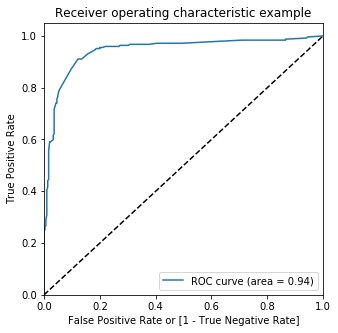

In [67]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [68]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.032367,422,0,1,0,0,0,0,0,0,0,0,0
1,1,0.032367,320,0,1,0,0,0,0,0,0,0,0,0
2,0,0.041758,441,0,1,0,0,0,0,0,0,0,0,0
3,0,0.137461,615,0,1,1,0,0,0,0,0,0,0,0
4,1,0.744914,493,1,1,1,1,1,1,1,1,1,0,0


In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.447464  1.000000  0.000000
0.1   0.1  0.833333  0.959514  0.731148
0.2   0.2  0.867754  0.955466  0.796721
0.3   0.3  0.873188  0.951417  0.809836
0.4   0.4  0.875000  0.947368  0.816393
0.5   0.5  0.885870  0.910931  0.865574
0.6   0.6  0.889493  0.878543  0.898361
0.7   0.7  0.862319  0.748988  0.954098
0.8   0.8  0.826087  0.655870  0.963934
0.9   0.9  0.764493  0.493927  0.983607


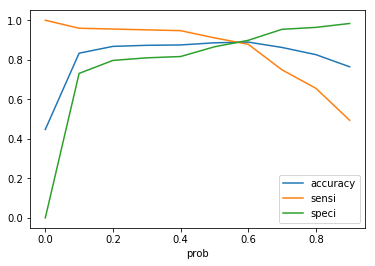

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.032367,422,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.032367,320,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.041758,441,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.137461,615,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.744914,493,1,1,1,1,1,1,1,1,1,0,0,1


In [72]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8894927536231884

In [73]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[274,  31],
       [ 30, 217]], dtype=int64)

In [74]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8785425101214575

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.898360655737705

In [77]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10163934426229508


In [78]:
# Positive predictive value 
print (TP / float(TP+FP))

0.875


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9013157894736842


In [80]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[264,  41],
       [ 22, 225]], dtype=int64)

## Precision and Recall

In [81]:
## Precision and Recall

In [82]:
##### Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8458646616541353

In [83]:
##### Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9109311740890689

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
?precision_score

In [86]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8458646616541353

In [87]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9109311740890689

### Precision and recall tradeoff

In [88]:
from sklearn.metrics import precision_recall_curve

In [89]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0      0
 1      1
 2      0
 3      0
 4      1
 5      1
 6      0
 7      0
 8      0
 9      0
 10     0
 11     0
 12     0
 13     0
 14     0
 15     0
 16     1
 17     0
 18     1
 19     1
 20     1
 21     0
 22     0
 23     0
 24     0
 25     1
 26     1
 27     0
 28     0
 29     1
       ..
 522    0
 523    0
 524    1
 525    0
 526    1
 527    0
 528    1
 529    1
 530    0
 531    1
 532    0
 533    1
 534    0
 535    0
 536    0
 537    0
 538    0
 539    0
 540    1
 541    1
 542    0
 543    1
 544    0
 545    0
 546    0
 547    1
 548    1
 549    0
 550    0
 551    1
 Name: Churn, Length: 552, dtype: int64, 0      0
 1      0
 2      0
 3      0
 4      1
 5      1
 6      0
 7      0
 8      1
 9      1
 10     0
 11     0
 12     0
 13     0
 14     0
 15     0
 16     1
 17     0
 18     0
 19     1
 20     1
 21     0
 22     0
 23     0
 24     0
 25     1
 26     1
 27     0
 28     0
 29     1
       ..
 522    0
 523    0
 524    1
 525    0


In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

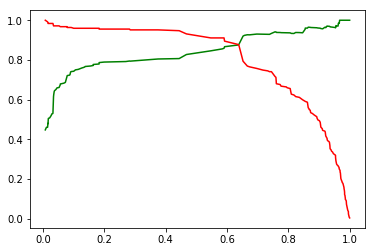

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [94]:
X_test[['Age','Debt','YearsEmployed','CreditScore','Income']] = scaler.transform(X_test[['Age','Debt','YearsEmployed','CreditScore','Income']])

In [95]:
X_test = X_test[col]
X_test.head()

,Married,BankCustomer,PriorDefault,Employed,CreditScore,cc,d,e,q,x,h,o,v,z,p
152,1,1,1,1,-0.087347,0,0,0,0,0,1,0,0,0,0
193,0,0,1,1,-0.341434,0,0,0,0,0,0,0,1,0,0
268,1,1,1,0,-0.595522,0,0,0,1,0,0,0,1,0,0
109,1,1,1,1,-0.383782,0,0,0,0,0,0,0,1,0,0
24,1,1,1,1,-0.468478,0,0,0,1,0,0,0,1,0,0


In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
y_test_pred = res.predict(X_test_sm)

In [98]:
y_test_pred[:10]

152    0.846011
193    0.610767
268    0.628894
109    0.757846
24     0.769116
393    0.028761
40     0.768802
355    0.054558
124    0.772179
221    0.959530
dtype: float64

In [99]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [100]:
# Let's see the head
y_pred_1.head()

,0
152,0.846011
193,0.610767
268,0.628894
109,0.757846
24,0.769116


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [102]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [103]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [105]:
y_pred_final.head()

,ApprovalStatus,CustID,0
0,1,152,0.846011
1,1,193,0.610767
2,1,268,0.628894
3,0,109,0.757846
4,1,24,0.769116


In [ ]:
# Renaming the column 
#y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','ApprovalStatus','Churn_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
#y_pred_final.head()

In [ ]:
# Import confusion_matrix
# ... YOUR CODE FOR TASK 10 ...

# Use logreg to predict instances from the test set and store it
#y_pred = logreg.predict(...)

# Get the accuracy score of logreg model and print it
#print("Accuracy of logistic regression classifier: ", ...)

# Print the confusion matrix of the logreg model
# ... YOUR CODE FOR TASK 10 ...

## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [ ]:
# Import GridSearchCV
# ... YOUR CODE FOR TASK 11 ...

# Define the grid of values for tol and max_iter
##tol = ...
##max_iter = ...

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
##param_grid = dict(..., ...)

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [ ]:
# Instantiate GridSearchCV with the required parameters
##grid_model = GridSearchCV(estimator=..., param_grid=..., cv=...)

# Use scaler to rescale X and assign it to rescaledX
##rescaledX = scaler....(...)

# Fit data to grid_model
##grid_model_result = grid_model.fit(..., ...)

# Summarize results
##best_score, best_params = ...
##print("Best: %f using %s" % (..., ...))